In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import more_itertools

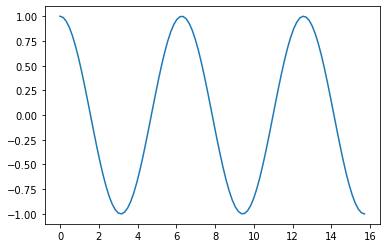

In [47]:
X = np.linspace(0, 5*np.pi, 100, endpoint=True)
C = np.cos(X)

plt.plot(X, C)

plt.show()

In [48]:
m_cos = list(more_itertools.windowed(C,10))

In [49]:
# m_cos = C.reshape((10,10))
m_cos = pd.DataFrame(m_cos, columns=['t9', 't8', 't7', 't6', 't5', 't4', 't3', 't2', 't1', 't0'])
m_cos

,t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
0,1.000000,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315
1,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866
2,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648
3,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648,-0.327068
4,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648,-0.327068,-0.472271
...,...,...,...,...,...,...,...,...,...,...
86,0.472271,0.327068,0.173648,0.015866,-0.142315,-0.296920,-0.444067,-0.580057,-0.701475,-0.805270
87,0.327068,0.173648,0.015866,-0.142315,-0.296920,-0.444067,-0.580057,-0.701475,-0.805270,-0.888835
88,0.173648,0.015866,-0.142315,-0.296920,-0.444067,-0.580057,-0.701475,-0.805270,-0.888835,-0.950071
89,0.015866,-0.142315,-0.296920,-0.444067,-0.580057,-0.701475,-0.805270,-0.888835,-0.950071,-0.987439


<AxesSubplot:>

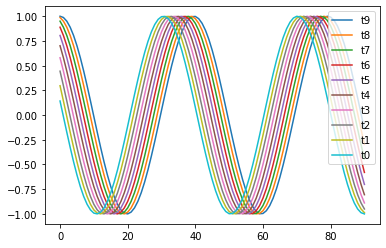

In [50]:
# Plot da série temporal completa
m_cos.plot()

<AxesSubplot:>

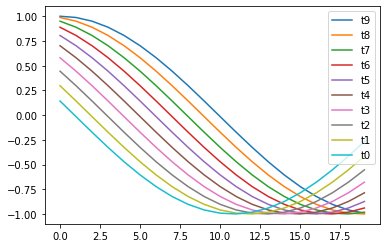

In [51]:
# Plot das primeiras 20 linhas
m_cos[:20].plot()

<AxesSubplot:>

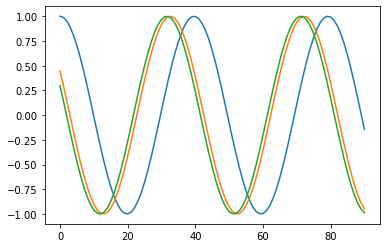

In [52]:
# plot que mostra as defasagens da série temporal
m_cos['t9'].plot() 
m_cos['t2'].plot()
m_cos['t1'].plot()


## Podemos observar acima a defasagem da função em relação ao intervalo anterior


Fica assim, então, construída a matriz defasada das posições, para em seguida alimentar a rede neural com valor de t9 a t1, para em seguida prever o t0

## Fornecer os valores de t1 a t9, para prever o t0

Definindo as variáveis de treino do modelo:

In [53]:
X = m_cos.drop('t0', axis=1)
X.head()

,t9,t8,t7,t6,t5,t4,t3,t2,t1
0,1.000000,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920
1,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315
2,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866
3,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648
4,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648,-0.327068


In [54]:
X.shape

(91, 9)

Definindo as variáveis de teste:

In [55]:
y = m_cos['t0']
y.head()

0    0.142315
1   -0.015866
2   -0.173648
3   -0.327068
4   -0.472271
Name: t0, dtype: float64

In [56]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

## Divisão da Série Temporal em Treino e Teste

In [57]:
X_train = X.iloc[0:60,:]
X_train.head()

,t9,t8,t7,t6,t5,t4,t3,t2,t1
0,1.000000,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920
1,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315
2,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866
3,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648
4,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648,-0.327068


In [58]:
X_train.shape

(60, 9)

In [59]:
y_train = y.iloc[0:60]
y.head()

0    0.142315
1   -0.015866
2   -0.173648
3   -0.327068
4   -0.472271
Name: t0, dtype: float64

In [60]:
y_train.shape

(60,)

In [61]:
X_test = X.iloc[60:91,:]
X_test.head()

,t9,t8,t7,t6,t5,t4,t3,t2,t1
60,-0.995472,-0.967949,-0.916108,-0.841254,-0.745264,-0.630553,-0.500000,-0.356886,-0.204807
61,-0.967949,-0.916108,-0.841254,-0.745264,-0.630553,-0.500000,-0.356886,-0.204807,-0.047582
62,-0.916108,-0.841254,-0.745264,-0.630553,-0.500000,-0.356886,-0.204807,-0.047582,0.110838
63,-0.841254,-0.745264,-0.630553,-0.500000,-0.356886,-0.204807,-0.047582,0.110838,0.266474
64,-0.745264,-0.630553,-0.500000,-0.356886,-0.204807,-0.047582,0.110838,0.266474,0.415415


In [62]:
y_test = y.iloc[60:91]
y_test.head()

60   -0.047582
61    0.110838
62    0.266474
63    0.415415
64    0.553920
Name: t0, dtype: float64

In [17]:
model = Sequential()
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

2021-08-23 18:07:51.888639: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-23 18:07:51.888970: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-23 18:07:51.889007: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gabriel-gabriel): /proc/driver/nvidia/version does not exist
2021-08-23 18:07:51.889281: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# fit model
model.fit(X_train, y_train, epochs=100, verbose=2)

2021-08-23 18:07:52.091386: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
2/2 - 1s - loss: 0.7551
Epoch 2/100
2/2 - 0s - loss: 0.7128
Epoch 3/100
2/2 - 0s - loss: 0.6735
Epoch 4/100
2/2 - 0s - loss: 0.6337
Epoch 5/100
2/2 - 0s - loss: 0.5960
Epoch 6/100
2/2 - 0s - loss: 0.5591
Epoch 7/100
2/2 - 0s - loss: 0.5256
Epoch 8/100
2/2 - 0s - loss: 0.4900
Epoch 9/100
2/2 - 0s - loss: 0.4574
Epoch 10/100
2/2 - 0s - loss: 0.4268
Epoch 11/100
2/2 - 0s - loss: 0.3970
Epoch 12/100
2/2 - 0s - loss: 0.3700
Epoch 13/100
2/2 - 0s - loss: 0.3488
Epoch 14/100
2/2 - 0s - loss: 0.3304
Epoch 15/100
2/2 - 0s - loss: 0.3143
Epoch 16/100
2/2 - 0s - loss: 0.2997
Epoch 17/100
2/2 - 0s - loss: 0.2871
Epoch 18/100
2/2 - 0s - loss: 0.2736
Epoch 19/100
2/2 - 0s - loss: 0.2621
Epoch 20/100
2/2 - 0s - loss: 0.2505
Epoch 21/100
2/2 - 0s - loss: 0.2368
Epoch 22/100
2/2 - 0s - loss: 0.2243
Epoch 23/100
2/2 - 0s - loss: 0.2121
Epoch 24/100
2/2 - 0s - loss: 0.2000
Epoch 25/100
2/2 - 0s - loss: 0.1869
Epoch 26/100
2/2 - 0s - loss: 0.1709
Epoch 27/100
2/2 - 0s - loss: 0.1567
Epoch 28/1

In [19]:
# demonstrate prediction
yhat = model.predict(X_test, verbose=2)

1/1 - 0s


In [20]:
yhat

array([[-0.04017361],
       [ 0.09781715],
       [ 0.27165788],
       [ 0.4141883 ],
       [ 0.55806184],
       [ 0.65713274],
       [ 0.789178  ],
       [ 0.8746823 ],
       [ 0.94348955],
       [ 0.9783553 ],
       [ 0.997123  ],
       [ 0.99482536],
       [ 0.96611345],
       [ 0.9082992 ],
       [ 0.82381904],
       [ 0.71700764],
       [ 0.60697436],
       [ 0.4817401 ],
       [ 0.34228233],
       [ 0.1795134 ],
       [ 0.01876383],
       [-0.13715088],
       [-0.298782  ],
       [-0.4392984 ],
       [-0.5807526 ],
       [-0.7064402 ],
       [-0.80513406],
       [-0.8919002 ],
       [-0.95322394],
       [-0.989962  ],
       [-1.0060505 ]], dtype=float32)

In [21]:
mean_squared_error(y_test,yhat)

4.5243151696483446e-05